## Data Collection

In [8]:
# request data using healthdata.gov API
import requests
import pandas as pd

url = "https://data.cms.gov/data-api/v1/dataset/c37ebe6d-f54f-4d7d-861f-fefe345554e6/data"
response = requests.get(url)
data = response.json()  # convert JSON response to a list of dictionaries
df = pd.DataFrame(data)  # create a DataFrame from the data
df.to_csv("cms_opioid_data.csv", index=False)  # save to CSV file



In [9]:
#preview data
df.head()

,Year,Geo_Lvl,Geo_Cd,Geo_Desc,Plan_Type,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2013,National,,National,All,33471552,506882862,6.6,,,2605496,7.78,,
1,2013,National,,National,FFS,15528221,240661427,6.45,,,1363671,8.78,,
2,2013,National,,National,MC,17943331,266221435,6.74,,,1241825,6.92,,
3,2014,National,,National,All,37014898,571877738,6.47,,-0.13,2767969,7.48,,-0.3
4,2014,National,,National,FFS,15303765,239577769,6.39,,-0.06,1279499,8.36,,-0.42


## Cleaning and Preprocessing
### Handling Issues/Noise in the Data (National)

In [10]:
# split data into national and state level datasets
national = df[:30]
state = df[30:]
national.head()

,Year,Geo_Lvl,Geo_Cd,Geo_Desc,Plan_Type,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2013,National,,National,All,33471552,506882862,6.6,,,2605496,7.78,,
1,2013,National,,National,FFS,15528221,240661427,6.45,,,1363671,8.78,,
2,2013,National,,National,MC,17943331,266221435,6.74,,,1241825,6.92,,
3,2014,National,,National,All,37014898,571877738,6.47,,-0.13,2767969,7.48,,-0.3
4,2014,National,,National,FFS,15303765,239577769,6.39,,-0.06,1279499,8.36,,-0.42


In [11]:

#clean national data

#drop redundant or irrelevant columns
national=national.drop(['Geo_Lvl','Geo_Cd','Opioid_Prscrbng_Rate_5Y_Chg','Opioid_Prscrbng_Rate_1Y_Chg','LA_Opioid_Prscrbng_Rate_5Y_Chg','LA_Opioid_Prscrbng_Rate_1Y_Chg'],axis=1)

In [12]:
# only retain rows with all types of plans
national = national[national['Plan_Type'] == 'All']

In [13]:
# rename columns

national.columns = ['year','geographic_level','plan','total_opioid_claims','total_claims','nat_opioid_presc_rate','long_acting_claims','nat_long_acting_rate']
national=national.drop(['plan','total_opioid_claims','total_claims','long_acting_claims','geographic_level'],axis=1)


### Understanding the Data (National)

In [14]:
national.dtypes

year                     object
nat_opioid_presc_rate    object
nat_long_acting_rate     object
dtype: object

In [16]:
#convert from objects to integers
national['nat_opioid_presc_rate'] = national['nat_opioid_presc_rate'].astype(str).astype(float)
national['nat_long_acting_rate'] = national['nat_long_acting_rate'].astype(str).astype(float)
national.dtypes

year                      object
nat_opioid_presc_rate    float64
nat_long_acting_rate     float64
dtype: object

### Basic Statisical Analysis

       nat_opioid_presc_rate  nat_long_acting_rate
count              10.000000              10.00000
mean                4.523000              12.64000
std                 1.455213               6.61608
min                 2.950000               7.48000
25%                 3.242500               7.55500
50%                 4.135000               8.65000
75%                 5.777500              17.75750
max                 6.600000              24.15000


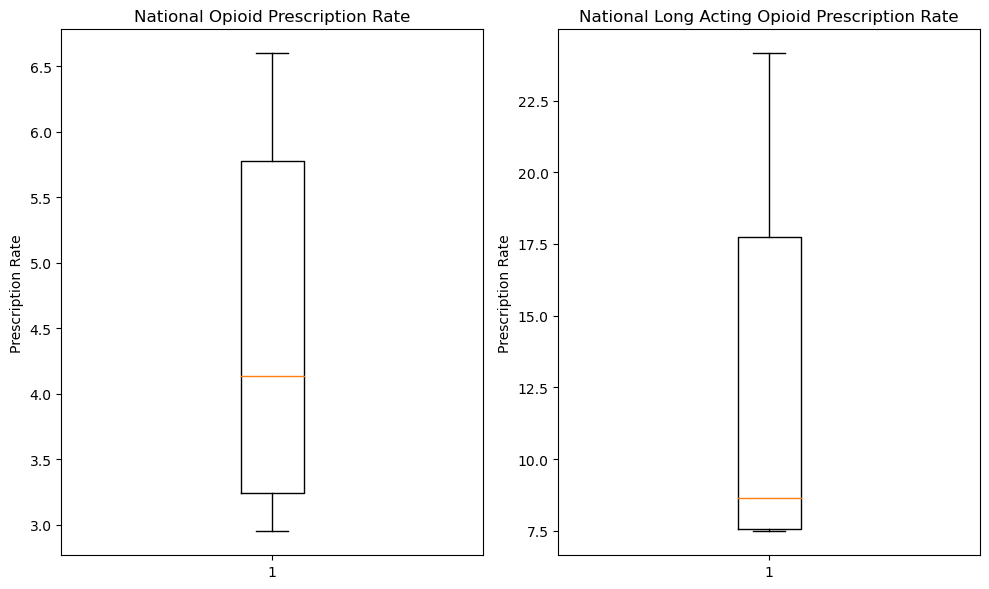

In [73]:
print(national.describe())

import matplotlib.pyplot as plt

# Create a figure and axes for side-by-side box plots
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Plot the first box plot
ax[0].boxplot(national['nat_opioid_presc_rate'])
ax[0].set_title('National Opioid Prescription Rate')
ax[0].set_ylabel('Prescription Rate')

# Plot the second box plot
ax[1].boxplot(national['nat_long_acting_rate'])
ax[1].set_title('National Long Acting Opioid Prescription Rate')
ax[1].set_ylabel('Prescription Rate')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


### Advanced Data Understanding

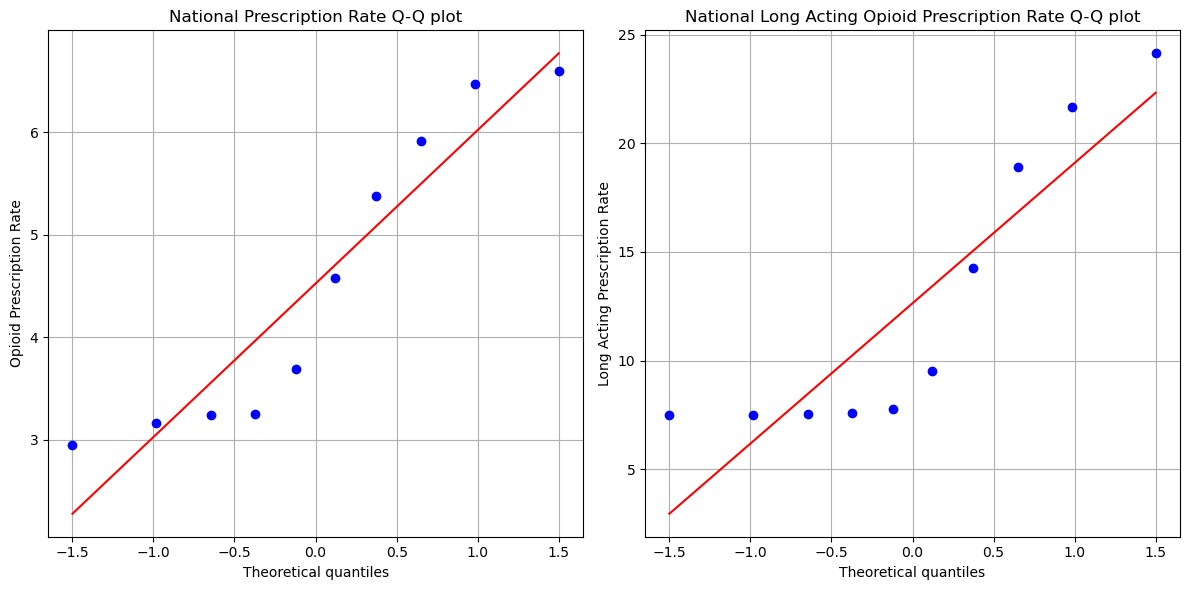

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

data_1 = national['nat_opioid_presc_rate']
data_2 = national['nat_long_acting_rate']

# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q plot for the first dataset
stats.probplot(data_1, dist="norm", plot=axes[0])
axes[0].set_title('National Prescription Rate Q-Q plot')
axes[0].set_xlabel('Theoretical quantiles')
axes[0].set_ylabel('Opioid Prescription Rate')
axes[0].grid(True)

# Q-Q plot for the second dataset
stats.probplot(data_2, dist="norm", plot=axes[1])
axes[1].set_title('National Long Acting Opioid Prescription Rate Q-Q plot')
axes[1].set_xlabel('Theoretical quantiles')
axes[1].set_ylabel('Long Acting Prescription Rate')
axes[1].grid(True)

# Adjust spacing between plots
plt.tight_layout()
plt.show()


### Visualizations (National)

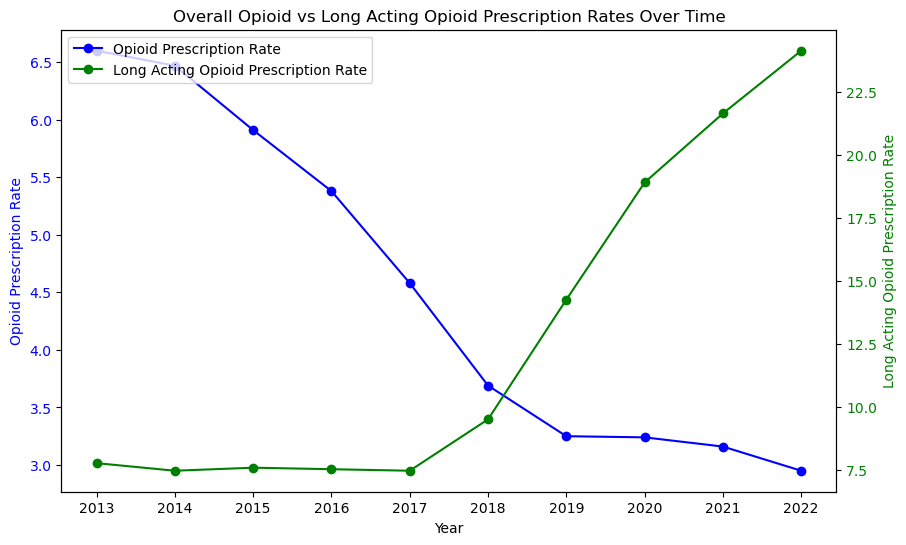

In [30]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first line for opioid prescription rate
ax1.plot(national['year'], national['nat_opioid_presc_rate'], marker='o', color='blue', label='Opioid Prescription Rate')
ax1.set_xlabel("Year")
ax1.set_ylabel("Opioid Prescription Rate", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(national['year'], national['nat_long_acting_rate'], marker='o', color='green', label='Long Acting Opioid Prescription Rate')
ax2.set_ylabel("Long Acting Opioid Prescription Rate", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title("Overall Opioid vs Long Acting Opioid Prescription Rates Over Time")
plt.show()


In [39]:
# clean state data
state.head(20)

,Year,Geo_Lvl,Geo_Cd,Geo_Desc,Plan_Type,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
30,2013,State,56,Wyoming,All,41202,529696,7.78,,,4230,10.27,,
31,2013,State,38,North Dakota,All,39906,588978,6.78,,,3472,8.7,,
32,2013,State,46,South Dakota,All,50847,694748,7.32,,,4180,8.22,,
33,2013,State,02,Alaska,All,73147,954919,7.66,,,8870,12.13,,
34,2013,State,30,Montana,All,87773,1041207,8.43,,,10713,12.21,,
35,2013,State,20,Kansas,All,79649,1090611,7.3,,,6747,8.47,,
36,2013,State,50,Vermont,All,118134,1335242,8.85,,,16549,14.01,,
37,2013,State,33,New Hampshire,All,96078,1444215,6.65,,,12906,13.43,,
38,2013,State,44,Rhode Island,All,108851,2058356,5.29,,,8387,7.71,,
39,2013,State,15,Hawaii,All,166393,2085367,7.98,,,17698,10.64,,


In [40]:
#drop redundant or irrelevant columns
state=state.drop(['Geo_Lvl','Geo_Cd','Opioid_Prscrbng_Rate_5Y_Chg','Opioid_Prscrbng_Rate_1Y_Chg',
                        'LA_Opioid_Prscrbng_Rate_5Y_Chg','LA_Opioid_Prscrbng_Rate_1Y_Chg'],axis=1)

In [41]:
state = state[state['Plan_Type'] == 'All']
state=state.drop(['Plan_Type'],axis=1)
state.head()

,Year,Geo_Desc,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate
30,2013,Wyoming,41202,529696,7.78,4230,10.27
31,2013,North Dakota,39906,588978,6.78,3472,8.7
32,2013,South Dakota,50847,694748,7.32,4180,8.22
33,2013,Alaska,73147,954919,7.66,8870,12.13
34,2013,Montana,87773,1041207,8.43,10713,12.21


In [42]:
state.columns = ['year','geographic_level','total_opioid_claims','total_claims','opioid_presc_rate','long_acting_claims','long_acting_rate']
state.size
print(state['year'].unique())

['2013' '2014' '2015' '2016' '2017' '2018' '2019']


In [43]:
state_2019 = state[state['year'] == '2019'].copy()
state_2019=state_2019.drop(['total_opioid_claims','total_claims','long_acting_claims'],axis=1)

In [44]:
state_2019.head(20)

,year,geographic_level,opioid_presc_rate,long_acting_rate
948,2019,Wyoming,4.43,10.85
949,2019,South Dakota,3.04,9.94
950,2019,North Dakota,3.12,3.17
951,2019,Alaska,4.56,12.64
952,2019,Vermont,3.21,14.72
953,2019,New Hampshire,2.43,13.76
954,2019,Maine,3.41,14.05
955,2019,District of Columbia,2.78,4
956,2019,Hawaii,3.91,9.17
957,2019,Idaho,3.62,7.93


In [77]:
state_2019['opioid_presc_rate'] = state_2019['opioid_presc_rate'].astype(str).astype(float)
state_2019['long_acting_rate'] = state_2019['long_acting_rate'].astype(str).astype(float)
#state['total_opioid_claims'] = state['total_opioid_claims'].astype(str).astype(float)
#state['long_acting_rate'] = state['long_acting_rate'].astype(str).astype(float)
#state['year'] = state['year'].astype(str)

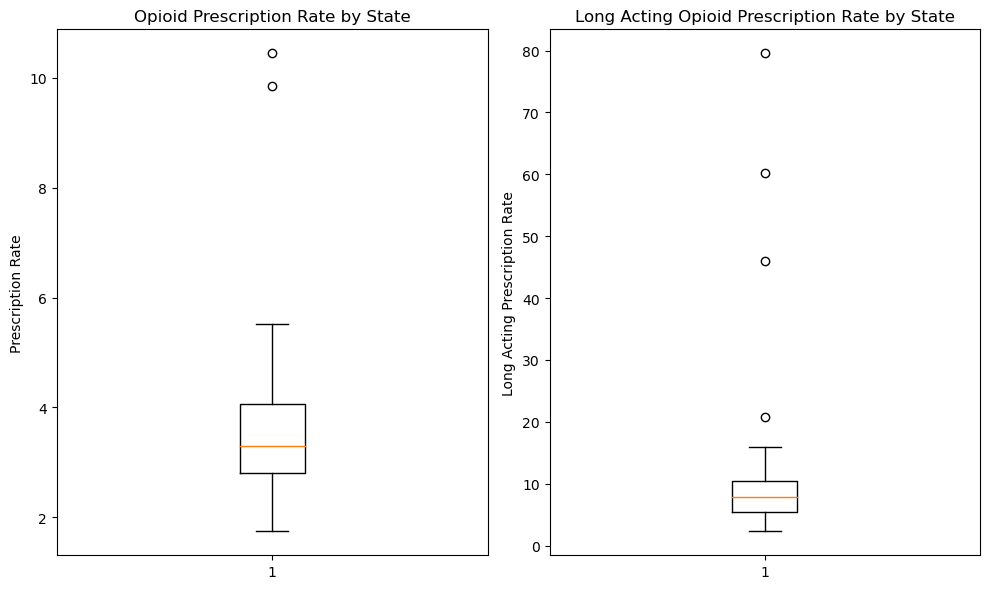

In [78]:
import matplotlib.pyplot as plt

# Create a figure and axes for side-by-side box plots
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Plot the first box plot
ax[0].boxplot(state_2019['opioid_presc_rate'])
ax[0].set_title('Opioid Prescription Rate by State')
ax[0].set_ylabel('Prescription Rate')

# Plot the second box plot
ax[1].boxplot(state_2019['long_acting_rate'])
ax[1].set_title('Long Acting Opioid Prescription Rate by State')
ax[1].set_ylabel('Long Acting Prescription Rate')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

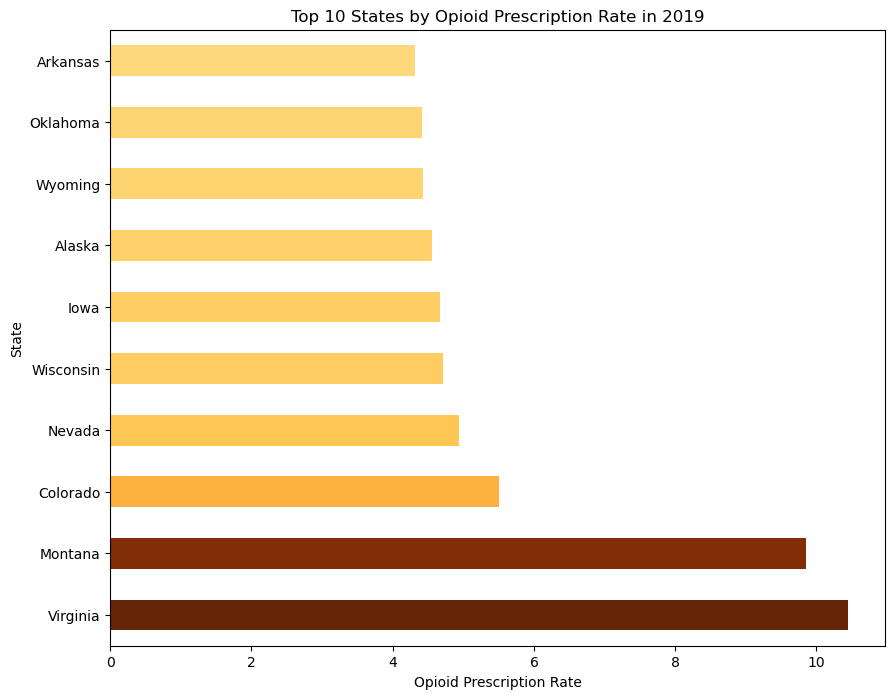

In [70]:
# Get the top 10 states by opioid prescription rate
top_10_states = state_2019.nlargest(10, 'opioid_presc_rate')

# Create a horizontal bar chart with the same color scheme
fig, ax = plt.subplots(figsize=(10, 8))
colors = [gdf[gdf['NAME'] == state]['value_determined_color'].iloc[0] for state in top_10_states['geographic_level']]

# Plot the horizontal bar chart
top_10_states.plot(
    kind='barh',  # Horizontal bar chart
    x='geographic_level',
    y='opioid_presc_rate',
    color=colors,
    legend=False,
    ax=ax
)

# Add titles and labels
plt.title('Top 10 States by Opioid Prescription Rate in 2019')
plt.xlabel('Opioid Prescription Rate')
plt.ylabel('State')

# Show the plot
plt.show()



In [34]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import missingno as msno
import os
import wget
import openpyxl
import math

In [35]:
wget.download("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip")

'cb_2018_us_state_500k.zip'

In [37]:
gdf = gpd.read_file(os.getcwd()+'/cb_2018_us_state_500k.zip')
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


In [49]:
gdf = gdf.merge(state_2019,left_on='NAME',right_on='geographic_level')

In [51]:
gdf.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,year,geographic_level,opioid_presc_rate,long_acting_rate
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...",2019,Mississippi,3.68,4.69
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",2019,North Carolina,3.35,11.41
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6...",2019,Oklahoma,4.42,8.08
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",2019,Virginia,10.45,79.56
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,...",2019,West Virginia,2.15,3.83


In [52]:
gdf.to_crs({'init':'epsg:2163'})

/opt/conda/lib/python3.10/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,year,geographic_level,opioid_presc_rate,long_acting_rate
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((1109990.968 -1565553.473, 1111...",2019,Mississippi,3.68,4.69
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((2154835.73 -692236.318, 215545...",2019,North Carolina,3.35,11.41
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-268956.153 -936541.911, -268644.29 ...",2019,Oklahoma,4.42,8.08
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((2098181.788 -490386.322, 20982...",2019,Virginia,10.45,79.56
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((1506493.502 -601384.449, 1506500.488...",2019,West Virginia,2.15,3.83
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((1079314.605 -1608998.456, 1079...",2019,Louisiana,3.26,2.31
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((1376552.929 -187673.161, 13766...",2019,Michigan,3.80,5.64
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((2420821.628 34539.216, 2421740...",2019,Massachusetts,2.24,9.59
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-1357097.048 78008.665, -1356418.733...",2019,Idaho,3.62,7.93
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((1997737.502 -1929546.629, 1997...",2019,Florida,2.58,7.16


In [53]:
# Apply this to the gdf to ensure all states are assigned colors by the same func
def makeColorColumn(gdf,variable,vmin,vmax):
    # apply a function to a column to create a new column of assigned colors & return full frame
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrBr)
    gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
    return gdf

In [59]:
# **************************
# set the value column that will be visualised
variable = 'opioid_presc_rate'

# make a column for value_determined_color in gdf
# set the range for the choropleth values with the upper bound the rounded up maximum value
vmin, vmax = gdf.opioid_presc_rate.min(), gdf.opioid_presc_rate.max() #math.ceil(gdf.pct_food_insecure.max())
# Choose the continuous colorscale "YlOrBr" from https://matplotlib.org/stable/tutorials/colors/colormaps.html
colormap = "YlOrBr"
gdf = makeColorColumn(gdf,variable,vmin,vmax)

# create "visframe" as a re-projected gdf using EPSG 2163 for CONUS
visframe = gdf.to_crs({'init':'epsg:2163'})

print(gdf.columns)
print(visframe.columns)



Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'year', 'geographic_level',
       'opioid_presc_rate', 'long_acting_rate', 'value_determined_color'],
      dtype='object')
Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'year', 'geographic_level',
       'opioid_presc_rate', 'long_acting_rate', 'value_determined_color'],
      dtype='object')


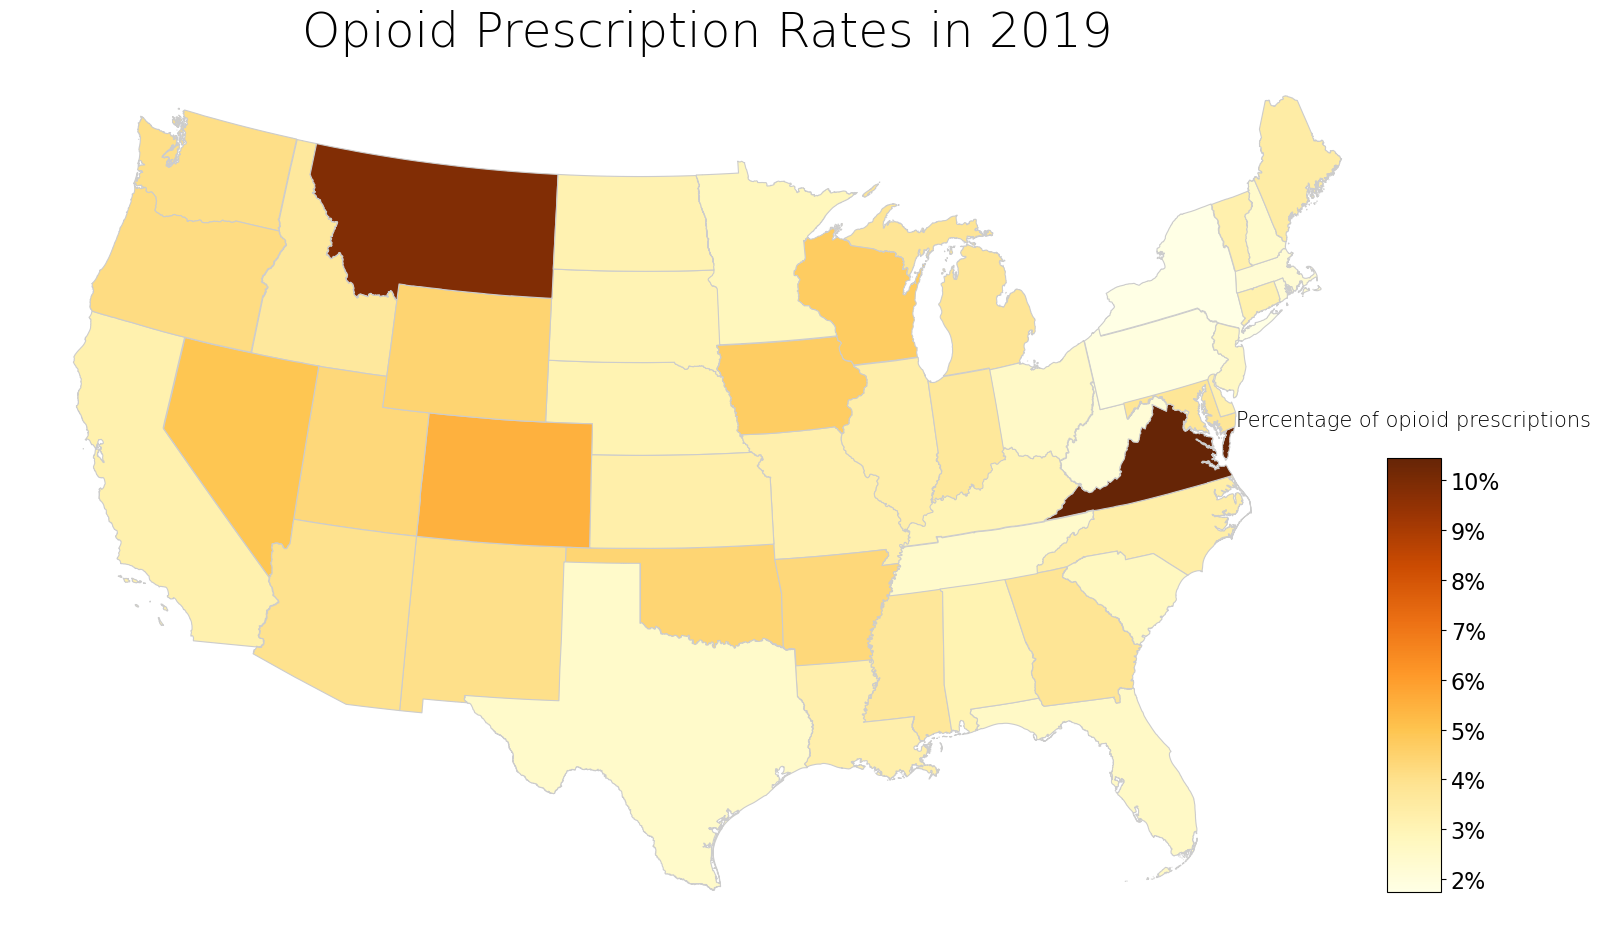

In [69]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 14))
# remove the axis box around the vis
ax.axis('off')

# set the font for the visualization to Helvetica
hfont = {'fontname': 'DejaVu Sans'}

# add a title and annotation
ax.set_title('Opioid Prescription Rates in 2019', **hfont, fontdict={'fontsize': '35', 'fontweight' : '1'})

# Create colorbar legend
fig = ax.get_figure()
# add colorbar axes to the figure
# This will take some iterating to get it where you want it [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])   

cbax.set_title('Percentage of opioid prescriptions\n', **hfont, fontdict={'fontsize': '15', 'fontweight' : '0'})

# add color scale
sm = plt.cm.ScalarMappable(cmap=colormap, \
                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
# reformat tick labels on legend
sm._A = []
comma_fmt = FuncFormatter(lambda x, p: format(x/100, '.0%'))
fig.colorbar(sm, cax=cbax, format=comma_fmt)
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)




# create map
# Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
for row in visframe.itertuples():
    if row.geographic_level not in ['Alaska','Hawaii']:
        vf = visframe[visframe.geographic_level==row.geographic_level]
        c = gdf[gdf.geographic_level==row.geographic_level][0:1].value_determined_color.item()
        vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')


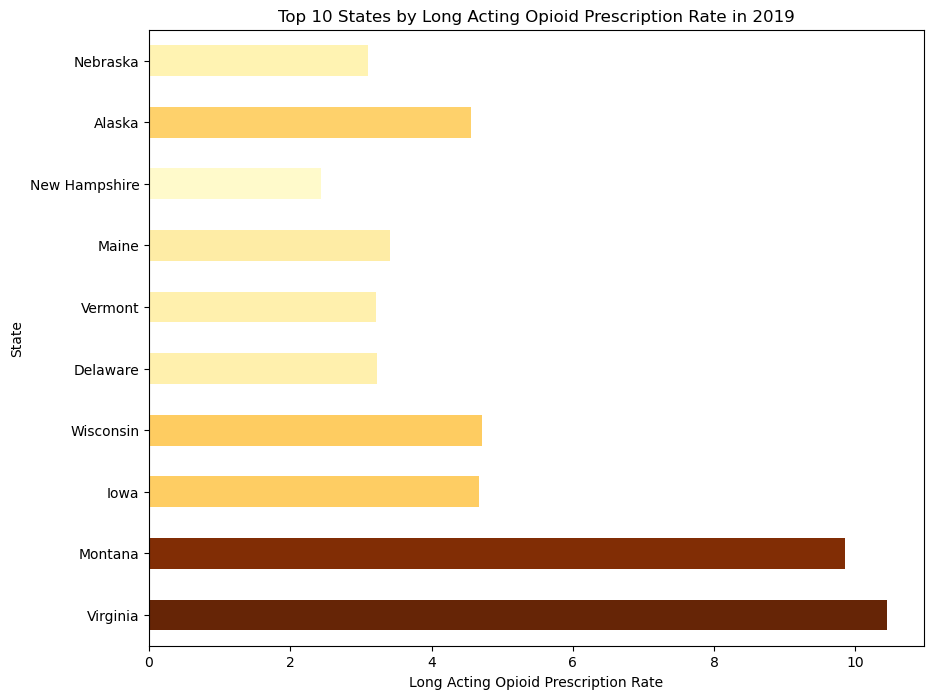

In [79]:
# Get the top 10 states by opioid prescription rate
top_10_states = state_2019.nlargest(10, 'long_acting_rate')

# Create a horizontal bar chart with the same color scheme
fig, ax = plt.subplots(figsize=(10, 8))
colors = [gdf[gdf['NAME'] == state]['value_determined_color'].iloc[0] for state in top_10_states['geographic_level']]

# Plot the horizontal bar chart
top_10_states.plot(
    kind='barh',  # Horizontal bar chart
    x='geographic_level',
    y='opioid_presc_rate',
    color=colors,
    legend=False,
    ax=ax
)

# Add titles and labels
plt.title('Top 10 States by Long Acting Opioid Prescription Rate in 2019')
plt.xlabel('Long Acting Opioid Prescription Rate')
plt.ylabel('State')

# Show the plot
plt.show()



In [80]:
print(state_2019.describe())

       opioid_presc_rate  long_acting_rate
count          51.000000         51.000000
mean            3.655686         11.242745
std             1.561106         13.741761
min             1.740000          2.310000
25%             2.795000          5.395000
50%             3.300000          7.940000
75%             4.055000         10.510000
max            10.450000         79.560000
